In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import cv2

In [28]:
images = utils.get_data()

In [29]:
autoencoder,encoder = utils.dense_autoencoder()

In [30]:
autoencoder.load_weights("weights/dense_autoencoder")

In [31]:
encoder.load_weights("weights/dense_encoder")

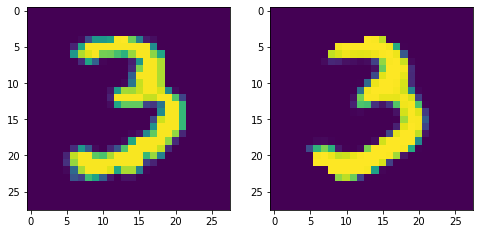

In [32]:
i = 9
img = images[i:i+1]

fig,axes = plt.subplots(1,2,figsize=(8,4))
axes[0].imshow(img.reshape(28,28))
axes[1].imshow(autoencoder.predict(img).reshape(28,28))

In [33]:
encodings = encoder.predict(images,batch_size=100)

### Clustering

In [44]:
from sklearn.cluster import KMeans
from pickle import dump,load

In [35]:
kmeans = KMeans(n_clusters=10)

In [36]:
kmeans.fit(encodings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
clusters = kmeans.predict(encodings)

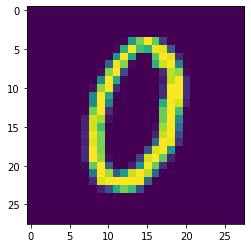

In [38]:
i = 5

img = images[i:i+1]

plt.imshow(img.reshape(28,28))

In [39]:
encoding = kmeans.predict(encoder(img))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [40]:
similer = images[encoding == clusters]

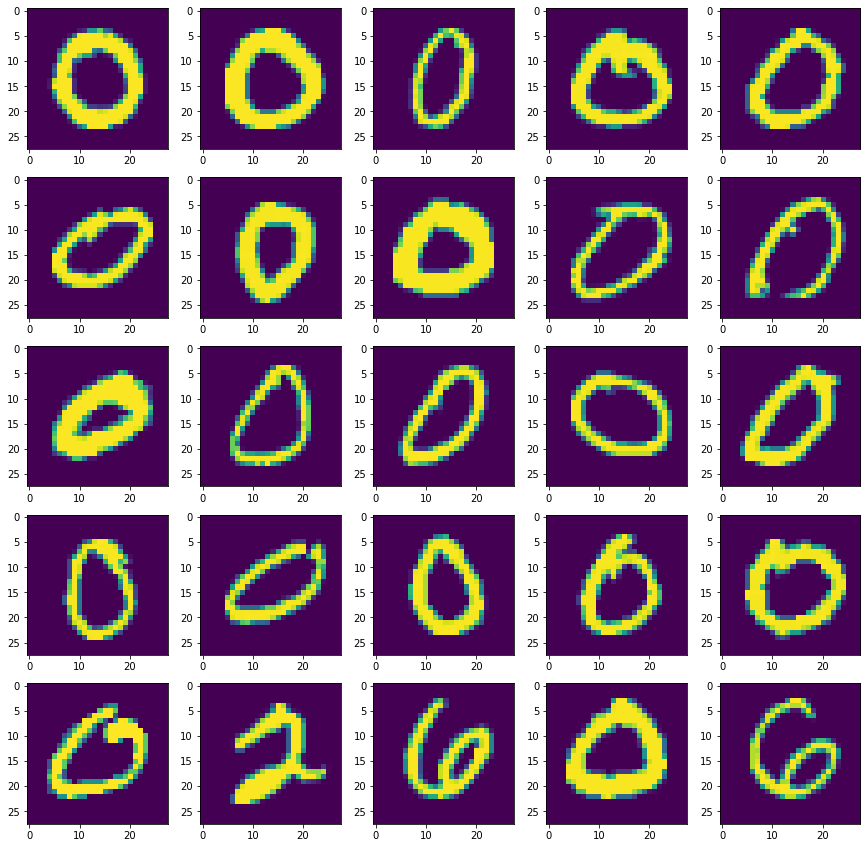

In [41]:
fig,axes = plt.subplots(5,5,figsize=(15,15))

imgs  = similer[0:25].reshape(-1,28,28)
axes = axes.reshape(25)

for i,a in zip(imgs,axes):
    a.imshow(i)

In [59]:
dump(kmeans,open("./weights/cluster_objects/kmeans_dense_cluster.pickle","wb"))

In [61]:
encodings

array([[0.       , 0.       , 1.1721475, ..., 0.8730651, 2.0695775,
        1.5457757],
       [0.       , 0.       , 4.4168177, ..., 1.9104487, 1.7894282,
        2.529593 ],
       [0.       , 0.       , 1.9170518, ..., 0.7401558, 0.6140203,
        1.3825777],
       ...,
       [0.       , 0.       , 3.102374 , ..., 1.4020324, 1.8399968,
        2.2695785],
       [0.       , 0.       , 4.119713 , ..., 1.7936393, 1.3997135,
        0.7731854],
       [0.       , 0.       , 3.8526611, ..., 1.8229059, 1.531125 ,
        1.8492498]], dtype=float32)

In [ ]:
np.save(encodings,)

### Testing Dumped Object

In [60]:
kmeans = load(open("./weights/cluster_objects/kmeans_dense_cluster.pickle","rb"))

In [48]:
encoding = kmeans.predict(encoder(img))

In [51]:
clusters = kmeans.predict(encodings)

In [52]:
similer = images[encoding == clusters]

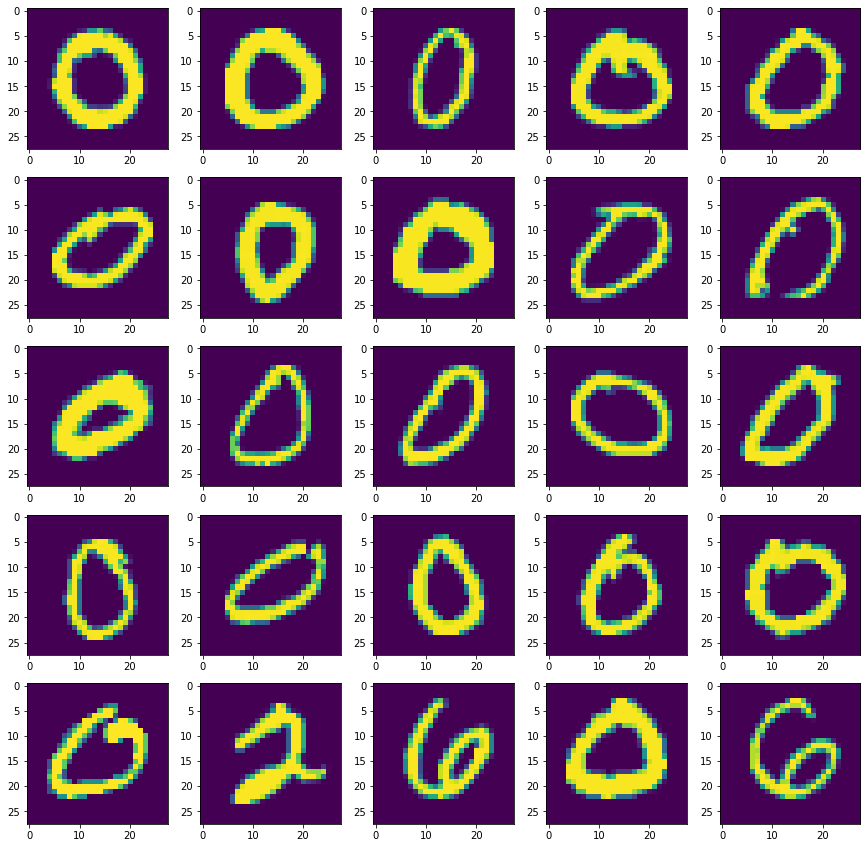

In [53]:
fig,axes = plt.subplots(5,5,figsize=(15,15))

imgs  = similer[0:25].reshape(-1,28,28)
axes = axes.reshape(25)

for i,a in zip(imgs,axes):
    a.imshow(i)